# 영화 리뷰를 사용한 텍스트 분류
- IMDB 데이터셋 이용
- data는 리뷰 단어를 정수 시퀀스로 변환되어 있음
- label은 긍정(positive), 부정(negative)로 분류

1. data load
2. data preporcessing
3. data 분리(train, test)
4. 모델 구성(model) : model정의, model.add, model.summary
5. model.compile(optimizer, loss, metrics)
6. model.fit(train_x, train_y, epoch, batch_size, validation_data, verbose)
7. model.evaluate(test_x, test_y)

In [160]:
from __future__ import absolute_import, division, print_function, unicode_literals

# !pip install -q tf-nightly-2.0-preview
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)
print(np.__version__)

1.13.2
1.16.1


In [161]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [162]:
print("훈련 샘플: {}, 레이블: {}".format(len(train_data), len(train_labels)))

훈련 샘플: 25000, 레이블: 25000


In [163]:
print(train_data[13])

[1, 259, 37, 100, 169, 1653, 1107, 11, 14, 418, 7, 595, 3882, 8, 28, 68, 419, 8932, 75, 28, 4, 2, 8802, 5227, 173, 58, 7164, 322, 19, 2, 32, 120, 41, 648, 2, 1990, 39, 2448, 2, 34, 35, 4595, 492, 150, 59, 9, 2, 7143, 5170, 32, 120, 4, 3904, 1873, 4, 766, 38, 6204, 820, 6133, 8, 3177, 2, 9106, 41, 957, 11, 620, 1093, 75, 28, 4, 658, 37, 517, 46, 34, 2, 6, 4057, 37, 43, 571, 8, 30, 27, 577, 442, 3072, 19, 90, 88, 29, 385, 99, 946, 5, 630, 34, 5330, 27, 668, 7698, 260, 383, 19, 41, 3586, 5, 95, 2, 41, 56, 75, 28, 4, 554, 37, 9, 6866, 2, 34, 27, 8176, 5, 37, 266, 344, 5, 3936, 27, 1633, 25, 67, 45, 32, 2, 933, 3374, 4, 64, 542, 561, 11, 14, 3388, 2446, 7, 5174, 9, 54, 4, 1246, 1496, 27, 6256, 2, 45, 6, 52, 155, 14, 2803, 16, 324, 23, 374, 88, 900, 51, 6, 437, 7, 3269, 22, 12, 62, 30, 48, 15, 232, 37, 1291, 2719, 3882, 8, 30, 928, 11, 14, 2, 9, 66, 622, 57, 594, 91, 84, 104, 2719, 26, 2140, 75, 219, 14, 2320, 20, 95, 276, 23, 1456, 255, 4, 3612, 449, 61, 558, 12, 16, 6, 2, 17, 8, 63, 31, 16

In [164]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [165]:
word_index = imdb.get_word_index()

```
word_index.items()
```

- output
```
dict_items([('fawn', 34701), ('tsukino', 52006), ('nunnery', 52007), ('sonja', 16816), ('vani', 63951), ('woods', 1408), ('spiders', 16115), ('hanging', 2345), ('woody', 2289), ('trawling', 52008), ("hold's", 52009), ('comically', 11307), ('localized', 40830), ('disobeying', 30568), ("'royale", 52010), ("harpo's", 40831), ('canet', 52011), ('aileen', 19313), ('acurately', 52012), ("diplomat's", 52013), ('rickman', 25242), ('arranged', 6746), ('rumbustious', 52014), ('familiarness', 52015), ("spider'", 52016),
```

In [56]:
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

In [59]:
for k, v in word_index.items():
    if v == 3:
        print(k)

<UNUSED>


### Dictionary의 key와 Value 위치 바꾸기

In [63]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

```
reverse_word_index
```

- output
```
{34704: 'fawn',
 52009: 'tsukino',
 52010: 'nunnery',
 16819: 'sonja',
 63954: 'vani',
 1411: 'woods',
 16118: 'spiders',
 2348: 'hanging',
 2292: 'woody',
 52011: 'trawling',
 52012: "hold's",
 11310: 'comically',
 40833: 'localized',
 30571: 'disobeying',
 52013: "'royale",
 ```

### reverse_word_index를 통해 정수 시퀀스로 나열된 리뷰를 문자열로 매핑

In [84]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, _) for i in text])

```
dictionary.get(key, value)
```
- get()은 딕셔너리의 값을 가져올 때 사용하는 함수

In [85]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

## 데이터 준비
- 원-핫 인코딩(one-hot encoding)은 정수 배열을 0과 1로 이루어진 벡터로 변환합니다. 예를 들어 배열 [3, 5]을 인덱스 3과 5만 1이고 나머지는 모두 0인 10,000차원 벡터로 변환할 수 있습니다. 그다음 실수 벡터 데이터를 다룰 수 있는 층-Dense 층-을 신경망의 첫 번째 층으로 사용합니다. 이 방법은 num_words * num_reviews 크기의 행렬이 필요하기 때문에 메모리를 많이 사용
- 정수 배열의 길이가 모두 같도록 패딩(padding)을 추가해 max_length * num_reviews 크기의 정수 텐서를 만듭니다. 이런 형태의 텐서를 다룰 수 있는 임베딩(embedding) 층을 신경망의 첫 번째 층으로 사용

### 리뷰마다 길이가 다름으로 길이 맞춤 : pad_sequences
- value : padding에 넣을 값 --> 여기서는 *word_index['<PAD'>]*는 "0"
- padding : "post"는 뒤쪽에 padding, "pre"는 앞쪽에 padding
```
dict = {'아':0, '이':1, '우':2}
sample_a = []
sample_b = []
num = np.arange(1,4)
for i in num:
    sample_a.append(num)
sample_a_ = keras.preprocessing.sequence.pad_sequences(sample_a,
                                                       value=0,
                                                       padding='post',
                                                       maxlen=10)
sample_b_ = keras.preprocessing.sequence.pad_sequences(sample_a,
                                                       value=dict['이'],
                                                       padding='post',
                                                       maxlen=10)
print(sample_a_)
print(sample_b_)
```
- output

```
[[1 2 3 0 0 0 0 0 0 0]
 [1 2 3 0 0 0 0 0 0 0]
 [1 2 3 0 0 0 0 0 0 0]]
[[1 2 3 1 1 1 1 1 1 1]
 [1 2 3 1 1 1 1 1 1 1]
 [1 2 3 1 1 1 1 1 1 1]]
 ```

In [105]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [132]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [133]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

## 모델 구성
- 어떻게 모델을 구성할 것이가를 고민하자.
- 얼마나 많은 층을 사용할 것인가, 은닉층은 얼마나 사용할 것인가 등

In [140]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16, input_shape=(None,)))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


#### - Embedding : 정수로 인코딩 단어 입력, 각 단어 인덱스 임베딩 벡터 찾음. (batch, sequence, embedding) -> (None, None, 16)
#### - GlobalAveragePooling1D : sequence 차원에 대한 평균 계산하여 고정된 출력 벡터 반환
#### - 나머지 층은 16 은닉 Fully connneted, 마지막층은 1 출력노드로 활성화함수는 0~1실수로 출력

In [141]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 검증 세트 만들기
- 훈련데이터에서 10000개 샘플만 떼어내서 validation set와 나머지 샘플로 실 훈련 set를 만듬

In [143]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

## 모델 훈련

In [144]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
15000/15000 [==============================] - 1s 50us/sample - loss: 0.6917 - acc: 0.6175 - val_loss: 0.6895 - val_acc: 0.6954
Epoch 2/40
15000/15000 [==============================] - 0s 13us/sample - loss: 0.6851 - acc: 0.7359 - val_loss: 0.6802 - val_acc: 0.7304
Epoch 3/40
15000/15000 [==============================] - 0s 14us/sample - loss: 0.6699 - acc: 0.7476 - val_loss: 0.6605 - val_acc: 0.7563
Epoch 4/40
15000/15000 [==============================] - 0s 14us/sample - loss: 0.6426 - acc: 0.7637 - val_loss: 0.6296 - val_acc: 0.7629
Epoch 5/40
15000/15000 [==============================] - 0s 14us/sample - loss: 0.6034 - acc: 0.7940 - val_loss: 0.5895 - val_acc: 0.7911
Epoch 6/40
15000/15000 [==============================] - 0s 13us/sample - loss: 0.5557 - acc: 0.8166 - val_loss: 0.5448 - val_acc: 0.8085
Epoch 7/40
15000/15000 [==============================] - 0s 13us/sa

## 모델 평가

In [146]:
results = model.evaluate(test_data,  test_labels, verbose=1)

print(results)

25000/25000 [==============================] - 1s 46us/sample - loss: 0.3426 - acc: 0.8693
[0.34263786410331726, 0.86932]


In [147]:
history

In [152]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

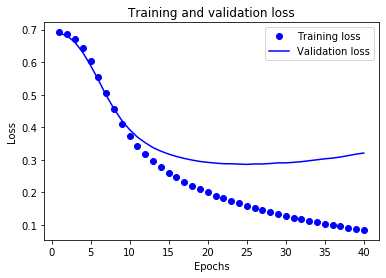

In [156]:
import matplotlib.pyplot as plt

acc = history_dict["acc"]
val_acc = history_dict["val_acc"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs= range(1, len(acc) + 1)

# "bo"는 파란색점
plt.plot(epochs, loss, 'bo', label='Training loss')
# "b"는 파란실선
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [157]:
plt.clf()   # 그림을 초기화합니다

<Figure size 432x288 with 0 Axes>

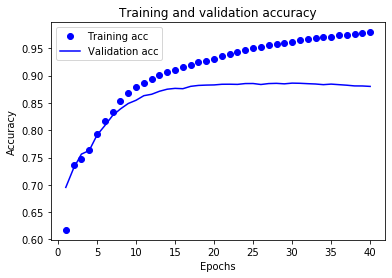

In [158]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()